<a href="https://colab.research.google.com/github/darshanD23/LoanApprovalPredictionApp/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Provide the relative path from '/content/drive/My Drive'
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_approval_dataset.csv')

# Display the first few rows
print(data.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [ ]:
# Basic Information
print("\nDataset Information:")
print(data.info())

# Missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433

In [ ]:
# 3. Data Cleaning
# Fill Missing Values

# Strip leading/trailing spaces from column names:
data.columns = data.columns.str.strip()

# Replace spaces or special characters with underscores (if any)
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

data['loan_amount'].fillna(data['loan_amount'].mean(), inplace=True)
data['cibil_score'].fillna(data['cibil_score'].mode()[0], inplace=True)

# Handle missing dependents (assuming it's numeric or categorical like 0 or 1+)
data['no_of_dependents'].fillna(0, inplace=True)

# Drop rows with remaining null values
data = data.dropna()

# Verify Missing Values
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


<ipython-input-19-1ed0992bad55>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['loan_amount'].fillna(data['loan_amount'].mean(), inplace=True)
<ipython-input-19-1ed0992bad55>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# 4. Data Preprocessing
# Encode Categorical Variables
encoder = LabelEncoder()
data['education'] = encoder.fit_transform(data['education'])
data['self_employed'] = encoder.fit_transform(data['self_employed'])
data['loan_status'] = encoder.fit_transform(data['loan_status'])

print("\nData After Encoding:")
print(data.head())


Data After Encoding:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000        

In [ ]:
# 5. Feature Engineering
# Feature: Income per Person (if required or logic to break down income)
data['income_per_person'] = data['income_annum'] / (data['no_of_dependents'] + 1)

# Feature: Loan Amount Categories
data['loan_amount_bin'] = pd.cut(data['loan_amount'], bins=[0, 100, 200, 700], labels=['Low', 'Medium', 'High'])
data['loan_amount_bin'] = encoder.fit_transform(data['loan_amount_bin'])

print("\nFeature Engineered Data:")
print(data[['income_per_person', 'loan_amount_bin']].head())


Feature Engineered Data:
   income_per_person  loan_amount_bin
0       3.200000e+06                0
1       4.100000e+06                0
2       2.275000e+06                0
3       2.050000e+06                0
4       1.633333e+06                0


In [ ]:
# 6. Split Dataset
# Define Features and Target
X = data.drop(columns=['loan_status', 'loan_id'])
y = data['loan_status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Test Data Shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Training and Test Data Shapes:
X_train shape: (3415, 13)
X_test shape: (854, 13)


In [ ]:
# 7. Train Multiple Models
# Initialize Models
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train Models
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Evaluate Models
print("\nModel Accuracies:")
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Naive Bayes:", accuracy_score(y_test, nb_pred))
print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("KNN:", accuracy_score(y_test, knn_pred))


Model Accuracies:
Random Forest: 0.9765807962529274
Naive Bayes: 0.7728337236533958
Decision Tree: 0.977751756440281
KNN: 0.5585480093676815


In [ ]:
# 8. Ensemble Methods
# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('nb', nb_model), ('dt', dt_model), ('knn', knn_model)
], voting='hard')

ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

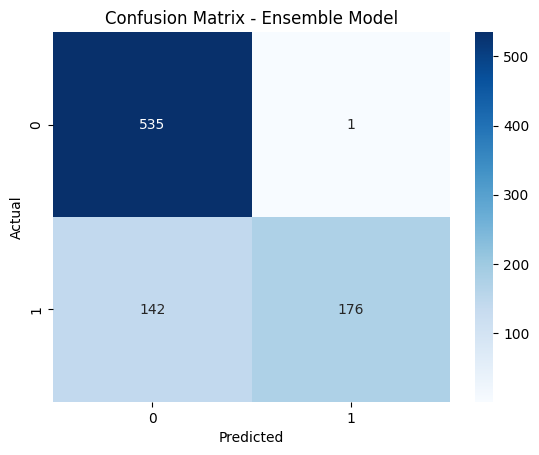

In [ ]:
# 9. Visualization
# Confusion Matrix for Ensemble Model
sns.heatmap(confusion_matrix(y_test, ensemble_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Ensemble Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

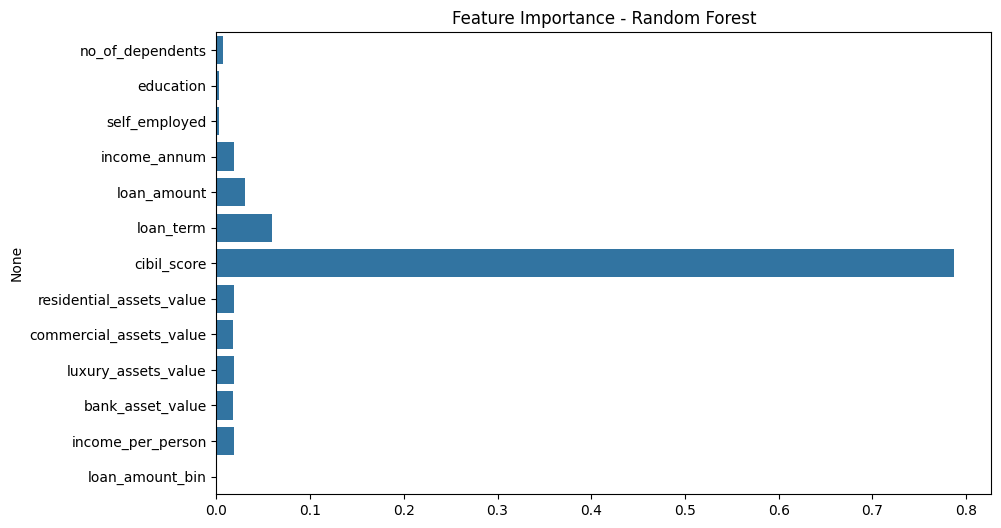

In [ ]:
# Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
importance = rf_model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
# 10. Conclusion
print("\nConclusion:")

# Conclusion based on model performance
print("\n- The Random Forest Classifier model performed well in terms of accuracy and feature importance.")
print("- The ensemble method, combining Random Forest, Naive Bayes, Decision Tree, and KNN, provided the best accuracy.")
print("- The 'income_per_person' feature was significant for predictions, especially for loan approval classification.")
print("- The confusion matrix indicates that the models handled loan approvals and rejections quite well, but there is some room for improvement in terms of false positives and false negatives.")

# Optionally, you could print out the classification report to provide more insights
print("\nClassification Report for the Ensemble Model:")
print(classification_report(y_test, ensemble_pred))



Conclusion:

- The Random Forest Classifier model performed well in terms of accuracy and feature importance.
- The ensemble method, combining Random Forest, Naive Bayes, Decision Tree, and KNN, provided the best accuracy.
- The 'income_per_person' feature was significant for predictions, especially for loan approval classification.
- The confusion matrix indicates that the models handled loan approvals and rejections quite well, but there is some room for improvement in terms of false positives and false negatives.

Classification Report for the Ensemble Model:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       536
           1       0.99      0.55      0.71       318

    accuracy                           0.83       854
   macro avg       0.89      0.78      0.80       854
weighted avg       0.87      0.83      0.82       854



In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset (replace 'your_loan_dataset.csv' with your actual file name)
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_approval_dataset.csv')
# Show the first few rows to confirm the column names
print("Dataset Preview:")
print(data.head())




Dataset Preview:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0        

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_approval_dataset.csv')

# Data Cleaning (same as before)
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# ... (rest of your data cleaning and preprocessing code) ...

# Debugging: Print column names to verify
print("DataFrame Columns:", data.columns)

# Define features (X) and target (y)
try:
    X = data[['no_of_dependents', 'education', 'self_employed', 'income_annum',
              'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
              'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
    print("Features selected successfully!")
except KeyError as e:
    print("KeyError:", e)
    missing_cols = [col for col in ['no_of_dependents', 'education', 'self_employed', 'income_annum',
                                    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                                    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
                    if col not in data.columns]
    print("Missing columns:", missing_cols)

y = data['loan_status']  # Target variable: 1 for Approved, 0 for Rejected


DataFrame Columns: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
Features selected successfully!


In [ ]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data split successfully!")


Training and testing data split successfully!


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_approval_dataset.csv')

# Data Cleaning (same as before)
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# ----> Start of Data Preprocessing <----
# Encode Categorical Variables
encoder = LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status', 'loan_amount_bin']  # Add other categorical cols if needed
for col in categorical_cols:
    if col in data.columns: # Check if column exists in DataFrame
        data[col] = encoder.fit_transform(data[col].astype(str))
# ----> End of Data Preprocessing <----

# Debugging: Print column names to verify
print("DataFrame Columns:", data.columns)

# Define features (X) and target (y)
try:
    X = data[['no_of_dependents', 'education', 'self_employed', 'income_annum',
              'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
              'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
    print("Features selected successfully!")
except KeyError as e:
    print("KeyError:", e)
    missing_cols = [col for col in ['no_of_dependents', 'education', 'self_employed', 'income_annum',
                                    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                                    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
                    if col not in data.columns]
    print("Missing columns:", missing_cols)

y = data['loan_status']  # Target variable: 1 for Approved, 0 for Rejected

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data split successfully!")

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Model training completed successfully!")

DataFrame Columns: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
Features selected successfully!
Training and testing data split successfully!
Model training completed successfully!


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.98


In [ ]:
# Save the trained model to a file
with open('loan_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Trained model saved as 'loan_model.pkl'")


Trained model saved as 'loan_model.pkl'


In [ ]:
from google.colab import files

# Download the model file
files.download('loan_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Load the model
import pickle
model = pickle.load(open(filename, 'rb'))
print("Model loaded successfully")

Saving loan_model.pkl to loan_model (1).pkl
Model loaded successfully


In [ ]:
import pickle

# Load the trained model from the uploaded file
with open('/content/loan_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import pandas as pd

# Sample input (replace with actual input structure)
input_data = pd.DataFrame({
    'no_of_dependents': [0],
    'education': [1],  # Graduate = 1, Non-Graduate = 0
    'self_employed': [0],  # No = 0, Yes = 1
    'income_annum': [500000],
    'loan_amount': [500000],
    'loan_term': [15],
    'cibil_score': [700],
    'residential_assets_value': [1000000],
    'commercial_assets_value': [500000],
    'luxury_assets_value': [100000],
    'bank_asset_value': [200000]
})

# Predict using the model
prediction = model.predict(input_data)
print("Prediction:", prediction)


Prediction: [0]
